In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [259]:
def loadData():
    data = pd.read_csv("Dataset.csv",header=None)
    data.columns=["X","Y"]
    return data
data=loadData()
# print(data.head(10))

In [266]:
print("mean of data :")
print(data.mean())

mean of data :
X    4.075000e-07
Y    2.227000e-07
dtype: float64


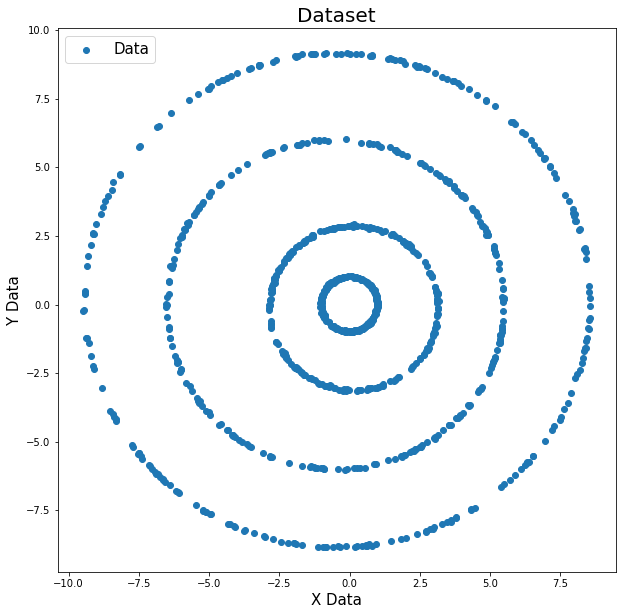

In [267]:
def changeDataStructure(data):
    data_numpy=data.to_numpy()
    data_numpy=data_numpy.transpose()
    return data_numpy

def dataCenter(data):
    mean=data.mean(axis=1,keepdims=True)
    data=data - mean
    return data

data=loadData()
data=changeDataStructure(data)
# data=dataCenter(data)
plt.figure(figsize=(10, 10))
plt.scatter(data[0],data[1],label="Data")

plt.title("Dataset",fontsize=20)
plt.xlabel("X Data",fontsize=15)
plt.ylabel("Y Data",fontsize=15)
plt.legend(loc="upper left",fontsize=15)

plt.show()

In [276]:
def findCovariance(data):
    cov=data@data.transpose()
    n=cov.shape[0]
    cov=cov/n
    return cov

def findEigen(covariance_matrix):
    eigen_value,eigen_vector= np.linalg.eig(covariance_matrix)
    return eigen_value,eigen_vector

def findTopKEigenVec(eigen_vector,eigen_value,k):
    n=eigen_value.shape[0]
    highest_eigen_val_index = eigen_value.argsort()[::-1]
    w=[] #top k eigen vectors are stored
    for i in range(k):
        w.append(np.array(eigen_vector[:,highest_eigen_val_index[i]]))
        w[i]=w[i].reshape(eigen_vector.shape[1],1)
    return w
    

k=2
covariance_matrix=findCovariance(data)
print(covariance_matrix)
eigen_value,eigen_vector=findEigen(covariance_matrix)
w=findTopKEigenVec(eigen_vector,eigen_value,k)

print("top k eigen vectors:")
print(w)
print("eigen values without sorting")
print(eigen_value)

[[7383.07788052  404.42951974]
 [ 404.42951974 8427.68169537]]
top k eigen vectors:
[array([[-0.323516 ],
       [-0.9462227]]), array([[-0.9462227],
       [ 0.323516 ]])]
eigen values without sorting
[7244.80237467 8565.95720122]


# How much of the variance in the data-set is explained by each of the principal components?

In [273]:
eigen_value.sort()
eigen_value=eigen_value[::-1]
print("variance by PC1 : ",eigen_value[0])
print("variance by PC2 : ",eigen_value[1])
s=sum(eigen_value)
variance_of_PC1 = eigen_value[0]/s
variance_of_PC2 = eigen_value[1]/s


print("percent variance by PC1 : ",variance_of_PC1*100)
print("percent variance by PC1 : ",variance_of_PC2*100)

variance by PC1 :  8565.95720122224
variance by PC2 :  7244.80237466537
percent variance by PC1 :  54.17802452885222
percent variance by PC1 :  45.82197547114779


In [274]:
def createProxy(w,data):
    new_data=(data.transpose() @ w) @ w.transpose()
    return new_data

/tmp/ipykernel_46095/2697016594.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


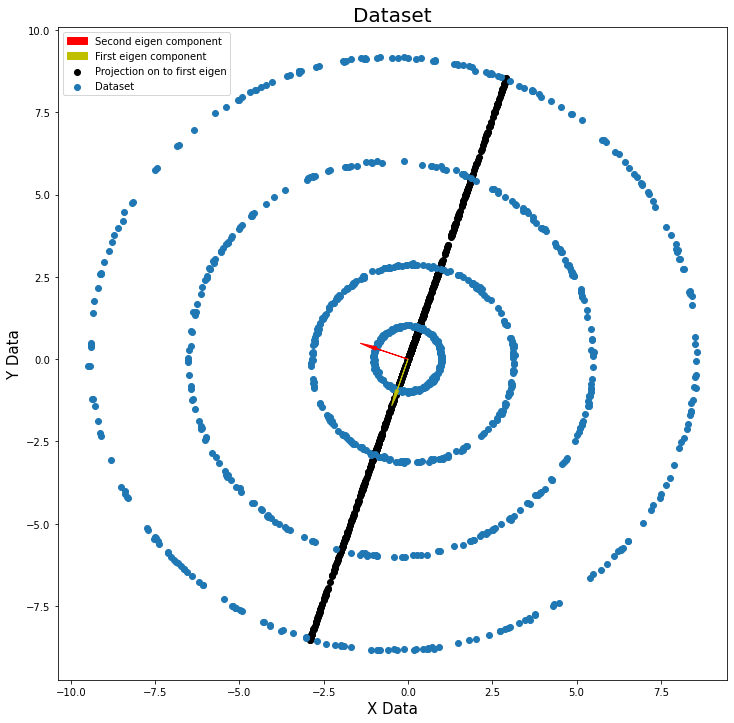

In [280]:
def plotOn_ith_Eigenvec(data,w,i):
    new_data=createProxy(w[i],data)
    plt.figure(figsize=(12, 12))
    plt.title("Dataset",fontsize=20)
    plt.xlabel("X Data",fontsize=15)
    plt.ylabel("Y Data",fontsize=15)
    plt.scatter(new_data.transpose()[0],new_data.transpose()[1],color='k',label="Projection on to first eigen")
    plt.scatter(data[0],data[1],label="Dataset")
    scale=1
    ax = plt.axes()
    ax.arrow(0,0,scale*w[1][0][0],scale*w[1][1][0] , head_width=0.1, head_length=0.5,color='r',label="Second eigen component")
    ax.arrow(0,0,scale*w[0][0][0],scale*w[0][1][0] , head_width=0.1, head_length=0.5,color='y',label="First eigen component")
    plt.legend(loc="upper left",fontsize=10)
    plt.show()

plotOn_ith_Eigenvec(data,w,0)

[[  472.6514272    472.02530375   471.15703819 ...  -593.72254285
   -874.7179173   -763.74135231]
 [  472.02530375   472.1944362    470.72268705 ...  -564.57809378
   -900.54274871  -764.91465279]
 [  471.15703819   470.72268705   477.20843209 ...  -528.71716262
   -897.75829102  -750.9874846 ]
 ...
 [ -593.72254285  -564.57809378  -528.71716262 ...  3805.66591912
  -1858.19351179   898.13417179]
 [ -874.7179173   -900.54274871  -897.75829102 ... -1858.19351179
   5182.1070889    359.78609535]
 [ -763.74135231  -764.91465279  -750.9874846  ...   898.13417179
    359.78609535  4050.98503774]]


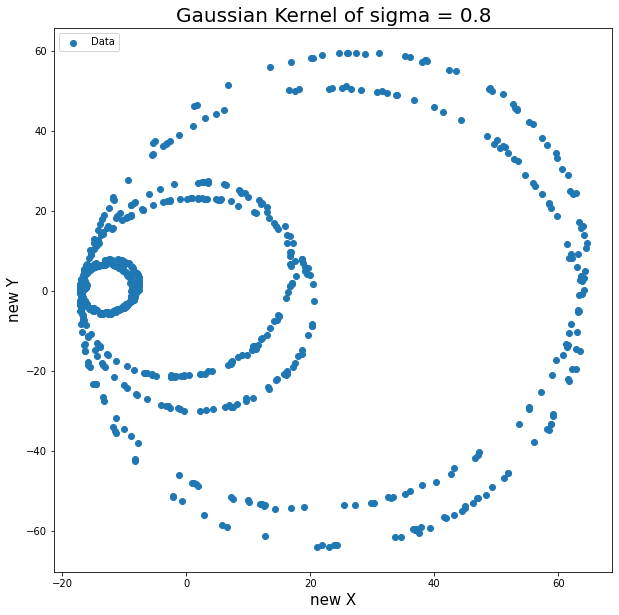

[[  472.6514272    472.02530375   471.15703819 ...  -593.72254285
   -874.7179173   -763.74135231]
 [  472.02530375   472.1944362    470.72268705 ...  -564.57809378
   -900.54274871  -764.91465279]
 [  471.15703819   470.72268705   477.20843209 ...  -528.71716262
   -897.75829102  -750.9874846 ]
 ...
 [ -593.72254285  -564.57809378  -528.71716262 ...  3805.66591912
  -1858.19351179   898.13417179]
 [ -874.7179173   -900.54274871  -897.75829102 ... -1858.19351179
   5182.1070889    359.78609535]
 [ -763.74135231  -764.91465279  -750.9874846  ...   898.13417179
    359.78609535  4050.98503774]]


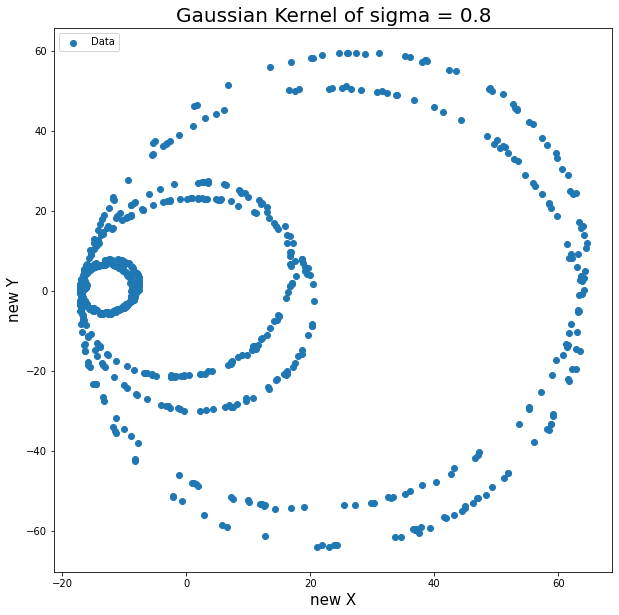

[[  472.6514272    472.02530375   471.15703819 ...  -593.72254285
   -874.7179173   -763.74135231]
 [  472.02530375   472.1944362    470.72268705 ...  -564.57809378
   -900.54274871  -764.91465279]
 [  471.15703819   470.72268705   477.20843209 ...  -528.71716262
   -897.75829102  -750.9874846 ]
 ...
 [ -593.72254285  -564.57809378  -528.71716262 ...  3805.66591912
  -1858.19351179   898.13417179]
 [ -874.7179173   -900.54274871  -897.75829102 ... -1858.19351179
   5182.1070889    359.78609535]
 [ -763.74135231  -764.91465279  -750.9874846  ...   898.13417179
    359.78609535  4050.98503774]]


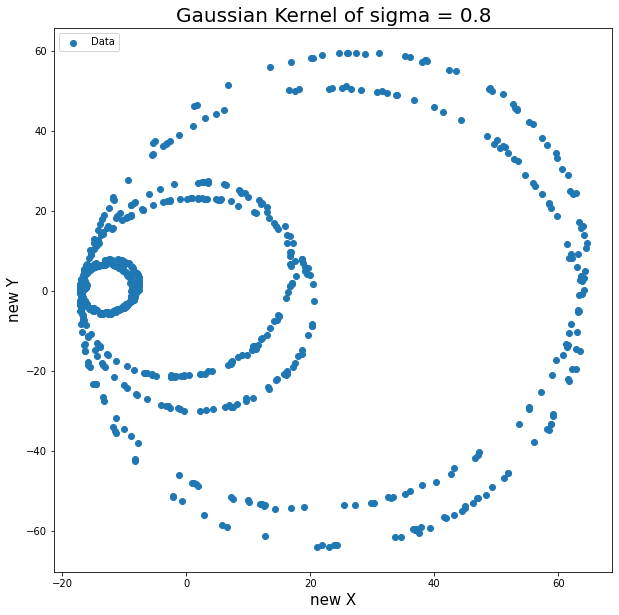

In [288]:
def polynomial_kernel(x,y,p):
    value=(x.transpose() @ y) + 1
    value=value**p;
    return value;

def gaussian_kernel(x,y,sigma):
    sub_val=x-y
    power_term=-(sub_val.transpose() @ sub_val)/(2*(sigma**2))
    value=np.exp(power_term)
    return value

def computePolynomilaKernelMatrix(data,polynomial):
    size=data.shape[1]
    K=np.zeros([size,size])
    for i in range(size):
        for j in range(size):
            K[i][j]=polynomial_kernel(data[:,i],data[:,j],polynomial)
    
    return K

def computeGaussianKernelMatrix(data,sigma):
    size=data.shape[1]
    K=np.zeros([size,size])
    for i in range(size):
        for j in range(size):
            K[i][j]=gaussian_kernel(data[:,i],data[:,j],sigma)
    
    return K
    
def centerKernelMatrix(K):
    n=K.shape[0];
    In = np.full((n,n), 1/n)
    K=K - In @ K - K @ In + In@K@In
    return K

def normalizeEigenVecor(eigenValue,beta,k): 
    
    sorted_eigen=np.sort(eigenValue)[::-1]
    for i in range(k):
        beta[i]=beta[i]/(sorted_eigen[i] ** 0.5)
    return beta

def KPCA(K,title):
    K=centerKernelMatrix(K)
    K_eigenvalue,K_eigenvector=findEigen(K)
    print(K_eigenvalue)
    beta=findTopKEigenVec(K_eigenvector,K_eigenvalue,2)
    alpha=normalizeEigenVecor(K_eigenvalue,beta,2)
    alpha[0].shape
    n=alpha[0].shape[0]
    
    new_X = K @ alpha[0]
    new_Y = K @ alpha[1]
    
    plt.figure(figsize=(10, 10))
    plt.title(title,fontsize=20)
    plt.scatter(new_X,new_Y,label="Data")
    plt.xlabel('new X', fontsize=15)
    plt.ylabel('new Y', fontsize=15)
    plt.legend(loc="upper left",fontsize=10)
    plt.show()


polynomials=[1,2,3]
sigmas=np.arange(0.1,1.1,0.1)

for polynomial in polynomials:
    K=computePolynomilaKernelMatrix(data,2)
#     print(K)
#     title="Polynomial Kernel of p = "+str(polynomial)
    KPCA(K,title)


# for sigma in sigmas:
#     K=computeGaussianKernelMatrix(data,sigma)
#     title="Gaussian Kernel of sigma = "+str(sigma)
#     KPCA(K,title)